In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import struct
from datetime import time
ticks_per_sec = 10000

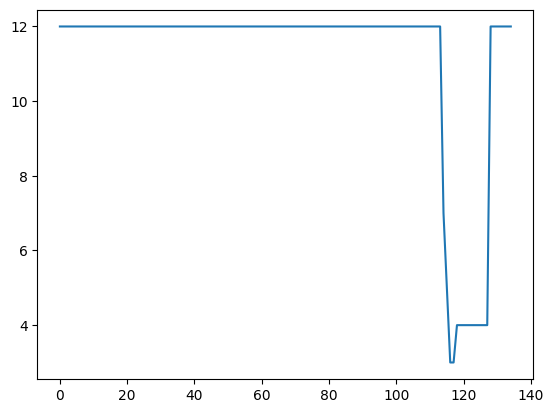

In [2]:
horusdf = pd.read_csv('/home/unknown/Backyard Flight/horus.csv')['satellites'].plot()

In [3]:
with open('/home/unknown/Backyard Flight/fast.cap') as f:
    fastlines = f.readlines()
fast_bytes = bytearray()
for i, line in enumerate(fastlines):
    try:
        fast_bytes.extend(bytearray.fromhex(line))
    except:
        print(i)

In [4]:
fast_pacs = struct.iter_unpack('qffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff', fast_bytes)

def modify_pacs(pac):
    inner = []
    gyro_start = 3
    acc_start = 33
    for i in range(10):
        l = [pac[0] if i == 0 else None, pac[1], pac[2], pac[gyro_start], pac[gyro_start+1],pac[gyro_start+2], pac[acc_start], pac[acc_start+1],pac[acc_start+2]]
        gyro_start+=3
        acc_start+=3
        inner.append(l)
    return inner


fast_pacs = sorted(fast_pacs, key = lambda l : l[0])

fast_parts = [small for pac in fast_pacs for small in modify_pacs(pac) ]
fastdf = pd.DataFrame(fast_parts, columns=['timestamp', 'press', 'temp', 'gx', 'gy', 'gz', 'ax', 'ay', 'az'])

fastdf = fastdf[fastdf.timestamp!=-1].dropna(how='all').interpolate()
fastdf.timestamp = fastdf.timestamp/ticks_per_sec

<Axes: xlabel='timestamp'>

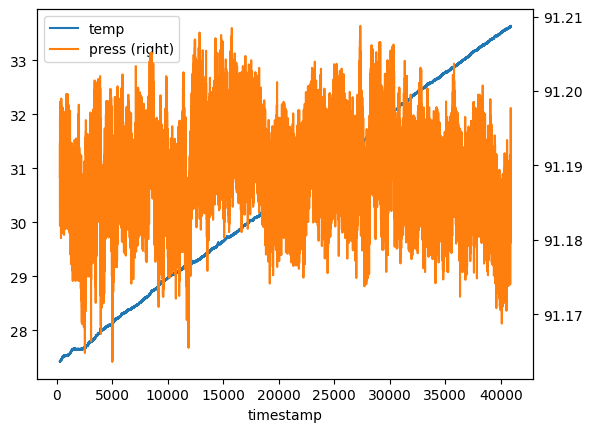

In [5]:
fastdf[['timestamp','temp','press']].plot(x='timestamp', secondary_y='press')

In [6]:

with open('/home/unknown/Backyard Flight/slow.cap') as f:
    slowlines = f.readlines()
slow_bytes = bytearray()
for line in slowlines:
    slow_bytes.extend(bytearray.fromhex(line))

In [7]:
slow_pacs = struct.iter_unpack('<qQhhbbbBBBHHBB', slow_bytes)
slowdf = pd.DataFrame.from_records(slow_pacs, columns=['timestamp', 'packed', 'latfrac', 'lonfrac', 'ox', 'oy', 'oz', 'flight_state', 'o2', 'o3', 'voltage', 'current', 'temp', 'flip_status'])
end_index = 1040
slowdf = slowdf.iloc[:end_index]

In [8]:
MILLIS_LOC, MILLIS_MASK = 1, 0b111111111111111111111111111
SATS_LOC, SATS_MASK = 28, 0b1111

def unpack_gps(u64):
    u64 = int(u64)
    as_millis = (u64 >> MILLIS_LOC) & MILLIS_MASK
    ms = as_millis % 1000
    as_sec = as_millis // 1000
    sec = as_sec % 60
    as_min = as_sec // 60
    min = as_min % 60
    hr = as_min // 60

    sats = (u64 >> SATS_LOC) & SATS_MASK

    t = time(hr, min, sec)

    return t, sats

In [9]:
fastdf.head(40)

,timestamp,press,temp,gx,gy,gz,ax,ay,az
160,301.02,91.188469,27.423004,0.040622,-0.065286,-0.188604,-0.413958,-2.403590,-10.551749
161,301.12,91.188469,27.423004,0.036346,-0.086208,-0.176081,1.115055,-2.310868,-10.714461
162,301.22,91.188469,27.423004,0.029703,-0.038255,-0.163635,1.569093,-2.350349,-8.398209
163,301.32,91.188469,27.423004,0.024969,-0.047265,-0.169438,-1.365703,-2.113460,-10.727023
164,301.42,91.188469,27.423004,0.004046,-0.070096,-0.184786,-1.556531,-2.022533,-10.538588
165,301.52,91.188469,27.423004,-0.016875,-0.019165,-0.171805,-1.451845,-1.925623,-10.272985
166,301.62,91.188469,27.423004,-0.018249,-0.060551,-0.171347,1.610369,-2.463410,-9.056235
167,301.72,91.188469,27.423004,-0.004963,-0.017333,-0.139200,1.181456,-2.456232,-9.483952
168,301.82,91.188469,27.423004,-0.016416,0.001756,-0.150196,0.610169,-2.423331,-9.922437
169,301.92,91.188469,27.423004,-0.032528,-0.010613,-0.161268,-0.043669,-2.015354,-8.961718


In [10]:
slowdf.head(20)

,timestamp,packed,latfrac,lonfrac,ox,oy,oz,flight_state,o2,o3,voltage,current,temp,flip_status
0,12589,3271865171315694480,-1106,10601,0,0,0,0,175,76,79,81,33,240
1,22684,3271865171315696480,-1106,10601,14,-7,125,1,20,214,146,0,28,255
2,32793,3271865171315698480,-1106,10601,-9,-5,126,1,122,98,145,0,28,255
3,42881,3271865171315700480,-1106,10601,-28,-9,123,1,146,55,146,0,28,255
4,52968,3271865171315702480,-1106,10601,-34,-12,121,1,81,165,146,0,28,255
5,63030,3271865171315704480,-1106,10601,-5,-9,126,1,114,144,146,0,28,255
6,73144,3271865171315706480,-1106,10601,-5,-7,126,1,10,165,146,0,28,255
7,83175,3272991071222551104,-1106,10601,-6,-7,126,1,14,227,146,0,28,255
8,93325,3272991071222553104,-1106,10601,-5,-7,126,1,80,113,146,0,28,255
9,103396,3272991071222555104,-1106,10601,-5,-9,126,1,122,172,146,0,28,255


In [11]:
voltage_base = 6.75; # 6.75 to 9.25
voltage_scale = 100; # 2.5 volt range to 250 volt range
lat_int = 31
long_int = -102

slowdf.ox = slowdf.ox.map(lambda i8 : i8/127)
slowdf.oy = slowdf.oy.map(lambda i8 : i8/127)
slowdf.oz = slowdf.oz.map(lambda i8 : i8/127)


slowdf.voltage = (slowdf.voltage / voltage_scale) + voltage_base

slowdf.timestamp = slowdf.timestamp/100
# slowdf.timestamp = slowdf.timestamp/ticks_per_sec

flight_state_to_str = ['NotSet', 'OnPad', 'Boost', 'Flight', 'InitialRoll', 'InitialPump', 'Continous']
slowdf.flight_state = slowdf.flight_state.map(lambda fs : flight_state_to_str[int(fs)])

IndexError: list index out of range

<Axes: xlabel='timestamp'>

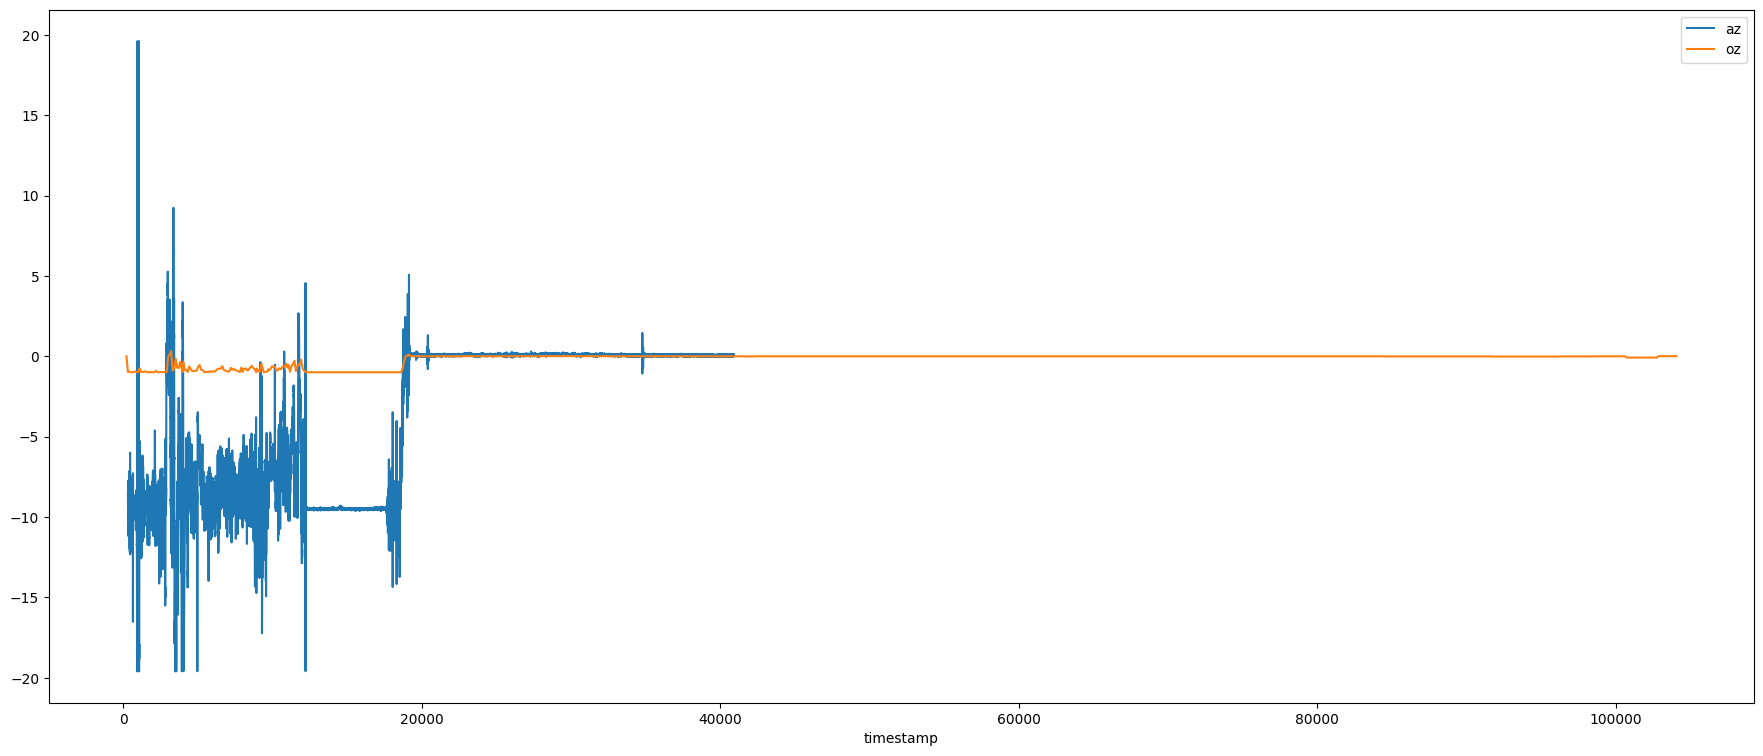

In [ ]:
    #  9566: Boost occured
    # 12296: Coast Reported by BoostTimer:                                                                                                                                 
    # 12691: Coast occured                                                                                                                                                 
#    409158: InitialInflationGroundHit Reported by GroundHitTimer: 
ax = fastdf[['timestamp', 'az']].plot(x='timestamp', figsize=(22, 9))
slowdf[['timestamp', 'oz']].plot(x='timestamp', ax=ax)

<Axes: >

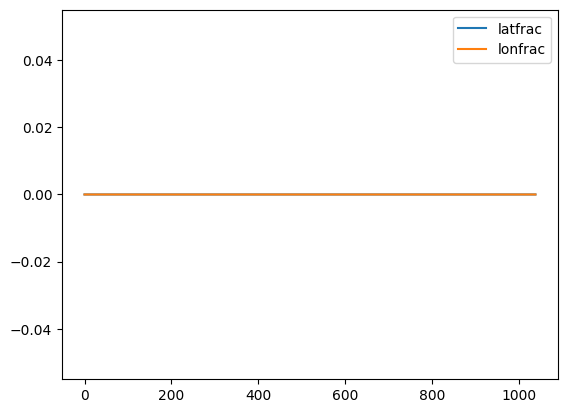

In [ ]:
slowdf[['latfrac', 'lonfrac']].plot()